In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from fastai import *
from fastai.vision import *

In [4]:
path = Path('images/Exp1/task/')

In [5]:
def get_y_fn(x):
    return x.parent.parent.parent/'labels'/x.name.replace("tif","png")

In [6]:
tfms = get_transforms(do_flip=True,
                      flip_vert=True,
                      max_rotate=90,
                      #max_lighting=0.0,
                      max_zoom=2,
                      #max_warp=0.0,
                      #p_affine=0.5,
                      #p_lighting=0.0,
                      #xtra_tfms=xtra_tfms,
                     )

In [20]:
files = get_image_files(path, recurse=True)
def spit_func(x):
    return x in val_files

In [38]:
train_files = [] 
[train_files.extend(files[:2]) for i in range(15)]
train_files
val_files = files[2:]

In [39]:
valid = SegmentationItemList(val_files)
train = SegmentationItemList(train_files)

item_list = ItemLists(path, train, valid)
item_list = item_list.label_from_func(get_y_fn, classes=['Bg', 'Fg'])
data = item_list.transform(tfms, size=512, tfm_y=True)
data = data.databunch(bs=4)
data = data.normalize()

In [55]:
list(set(data.train_ds.x.items))

[PosixPath('images/Exp1/task/train/37.tif'),
 PosixPath('images/Exp1/task/train/35.tif')]

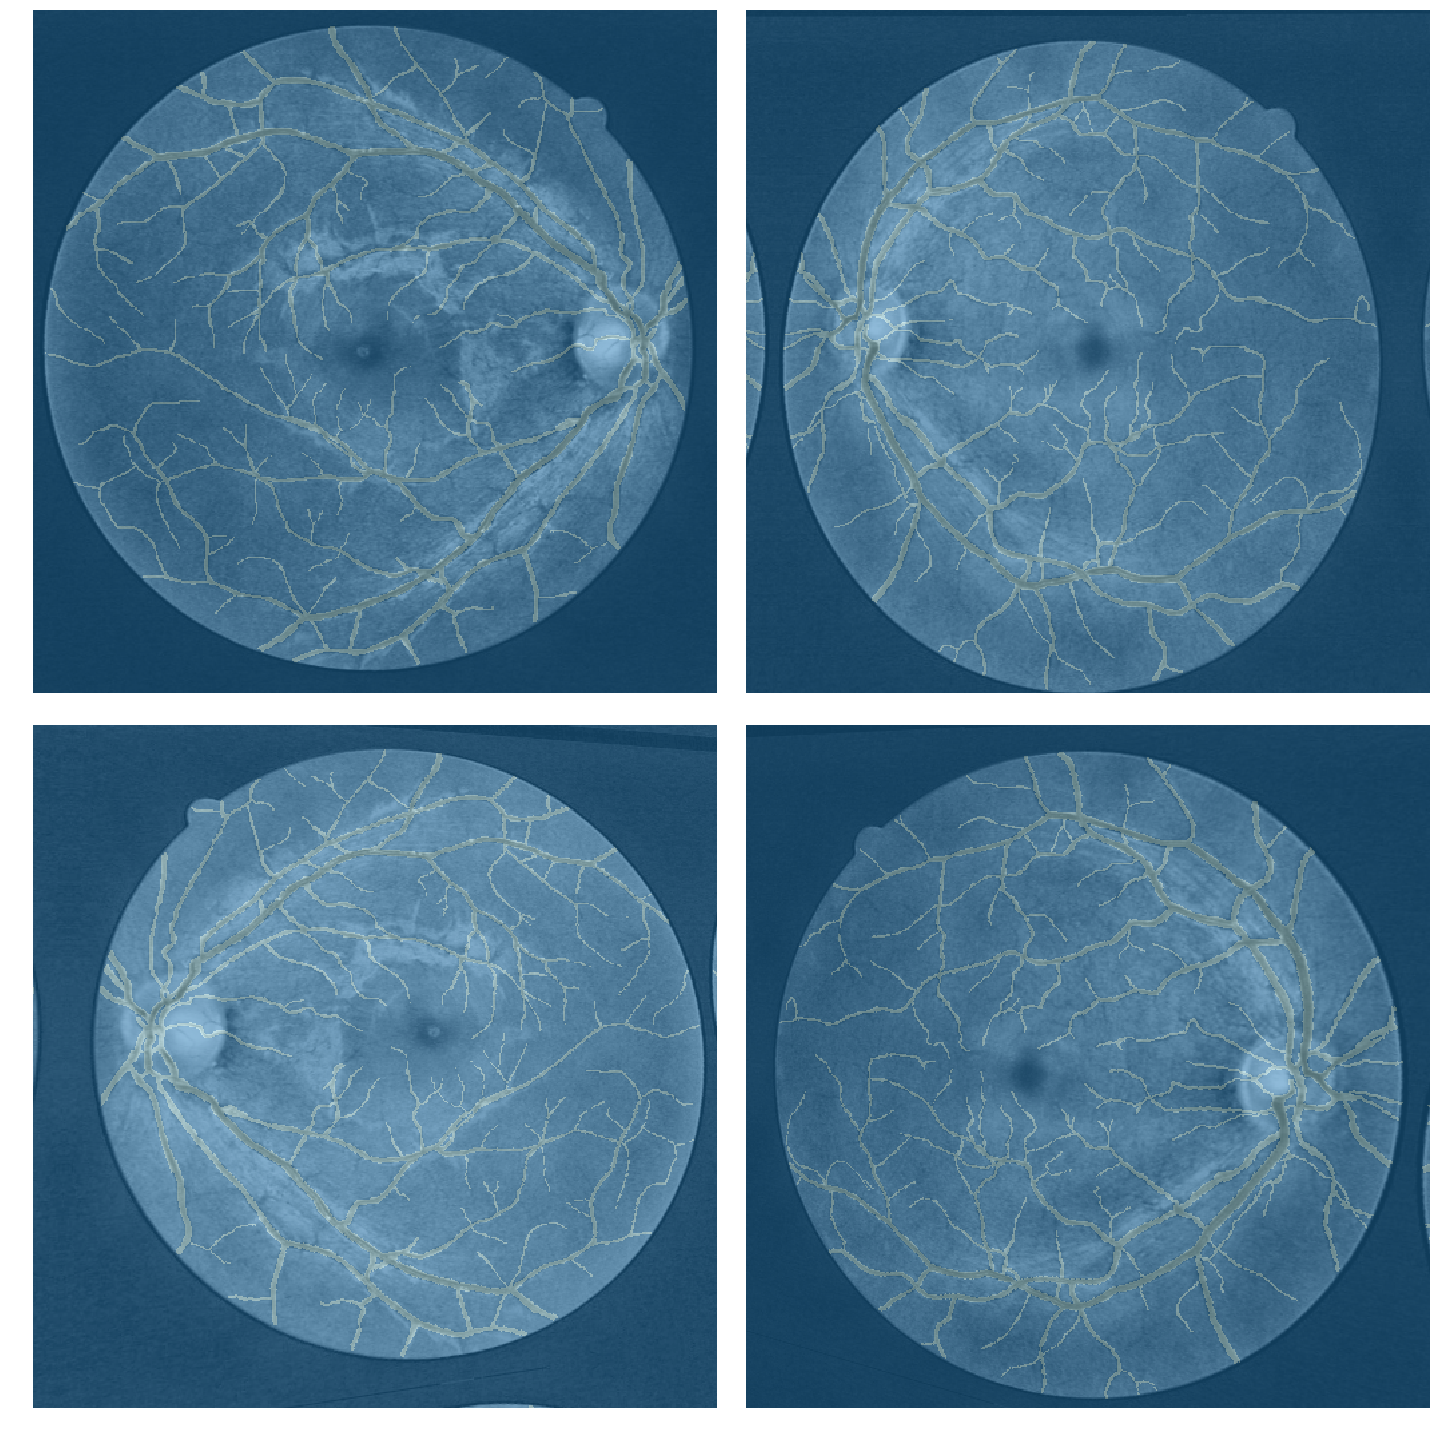

In [42]:
data.show_batch(rows=4, figsize=(20,20))

In [43]:
learn = unet_learner(data, models.resnet18, metrics=[dice])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


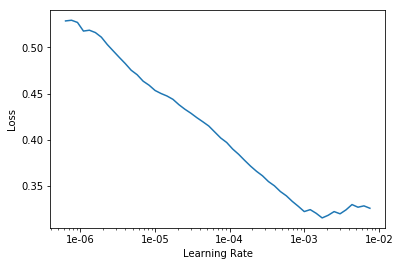

In [23]:
lr_find(learn)
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(5, 1e-4)

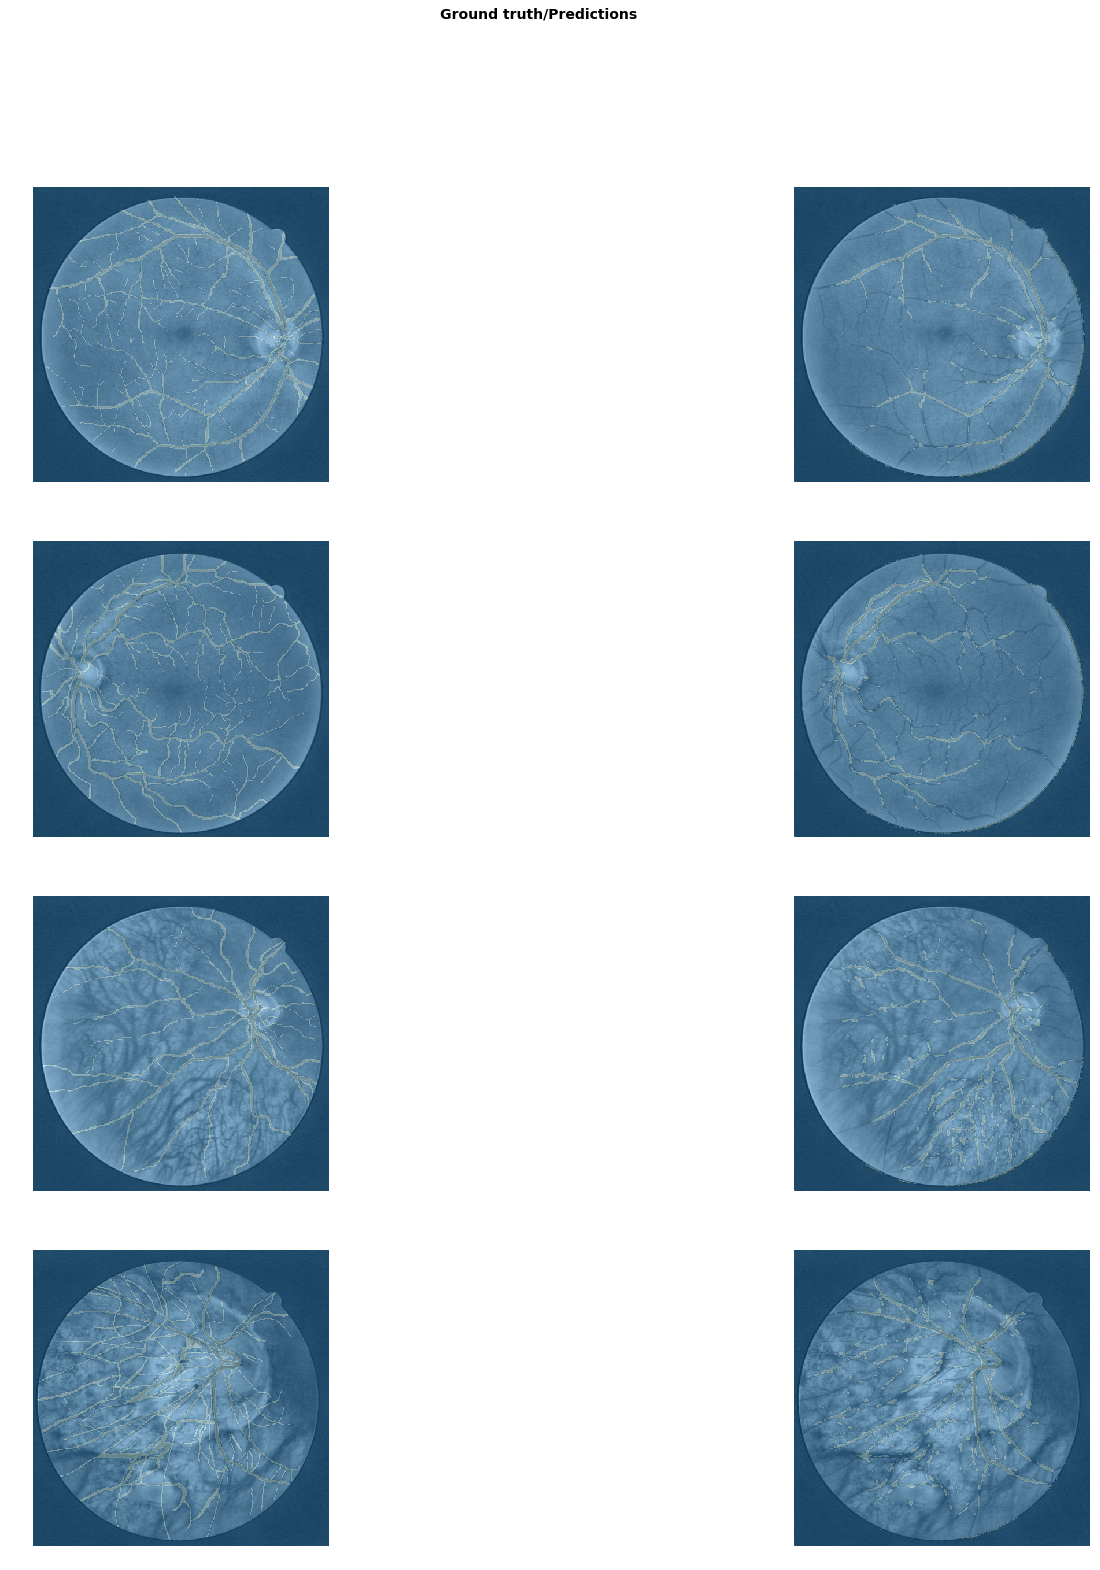

In [47]:
learn.show_results(rows=7, figsize=(25,25))

In [48]:
learn.unfreeze()

In [49]:
learn.fit_one_cycle(10, 1e-4)

In [51]:
learn.fit_one_cycle(10, 1e-4)

In [52]:
learn.fit_one_cycle(10, 1e-4)

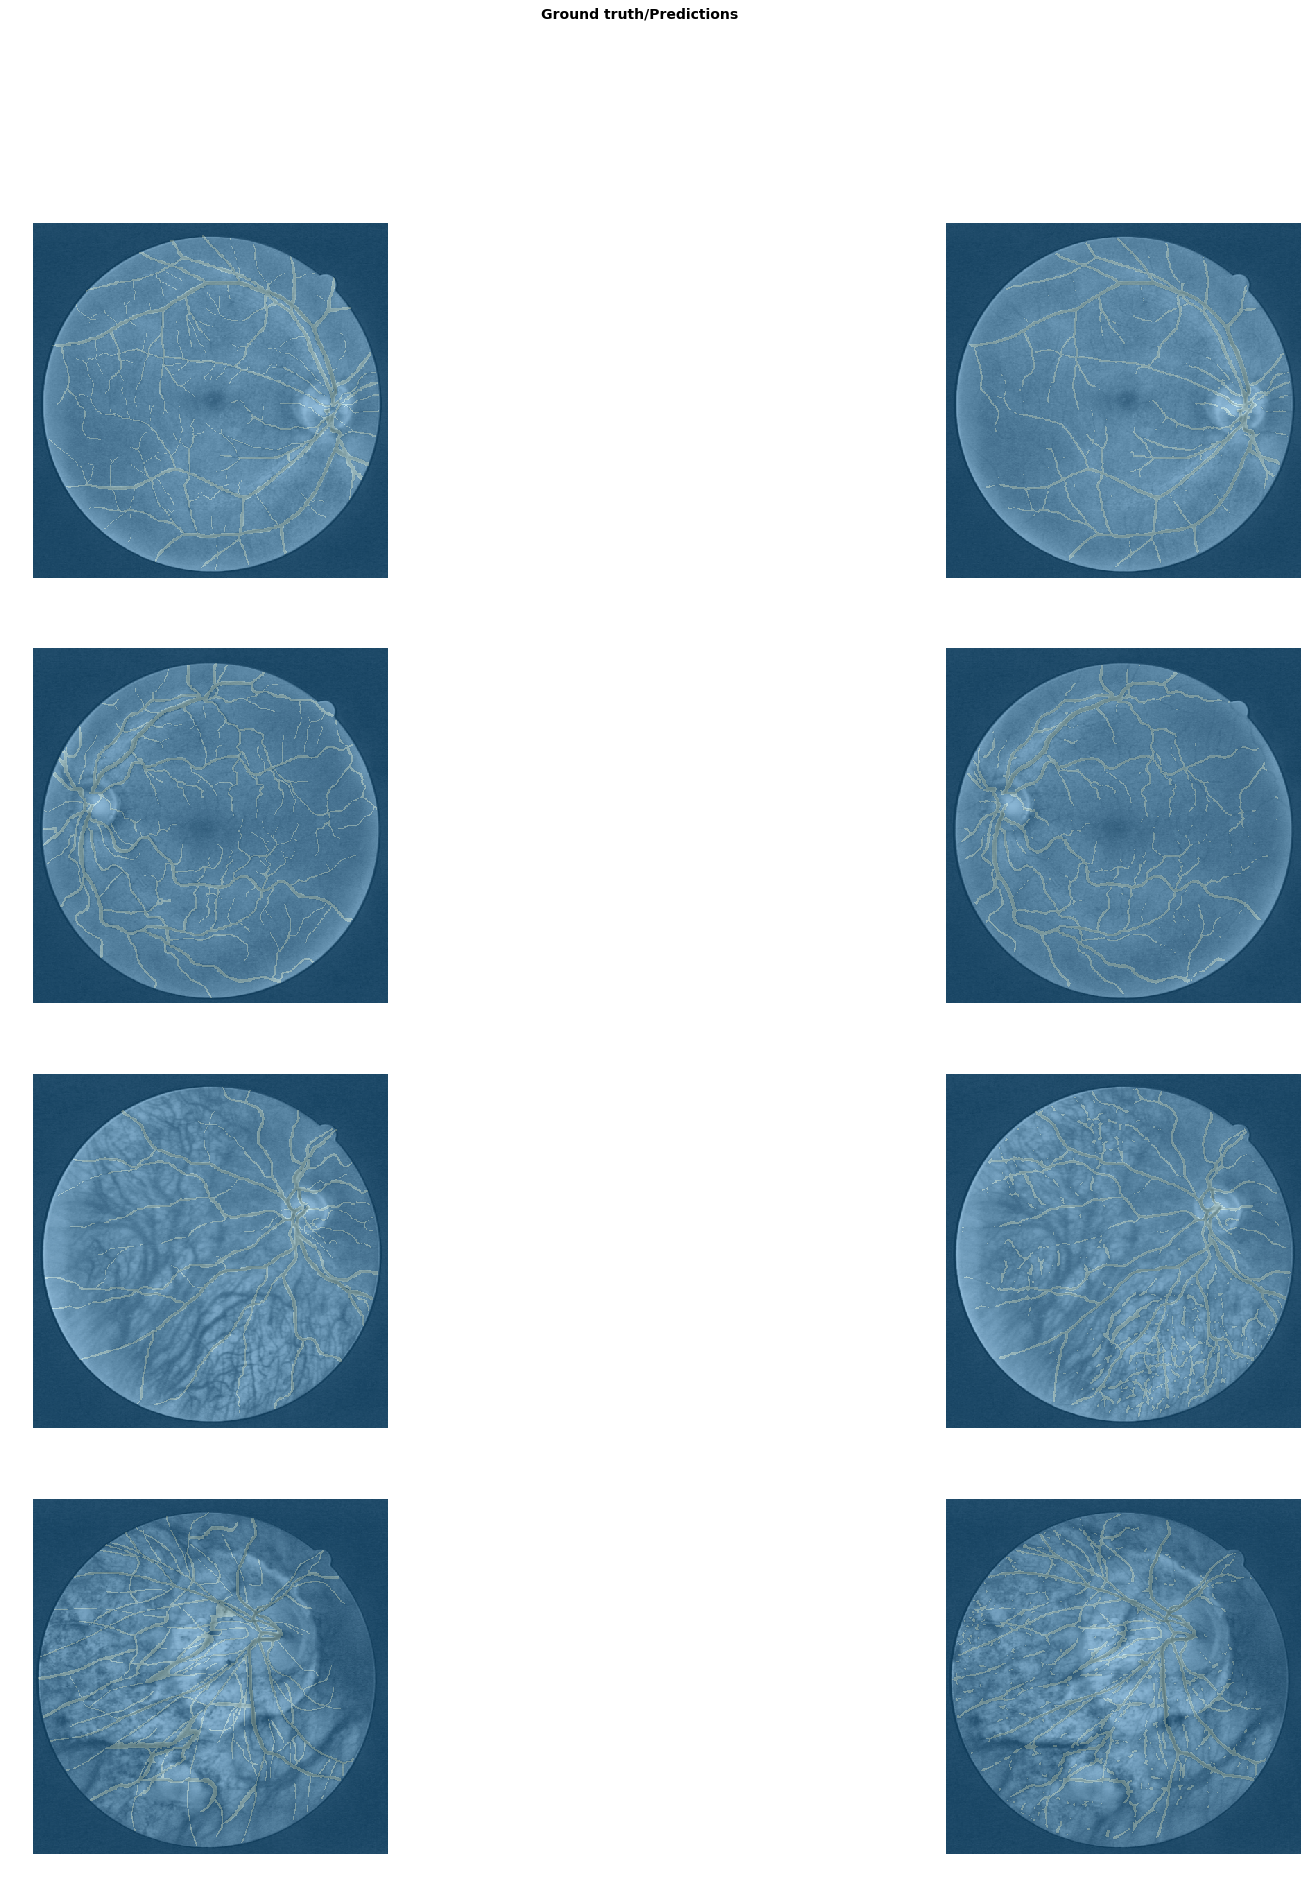

In [53]:
learn.show_results(rows=7, figsize=(30,30))